# Exercice 2

## Data preparation 

In [413]:
# First, import TF and get its version.
import tensorflow as tf
tf_version = tf.__version__

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('\033[91m' + 'WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('\033[92m' + 'OK: TensorFlow >= 2.0.0' + '.\033[0m')
    
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import utils
from sklearn.metrics import confusion_matrix

%matplotlib inline

OK: TensorFlow >= 2.0.0.


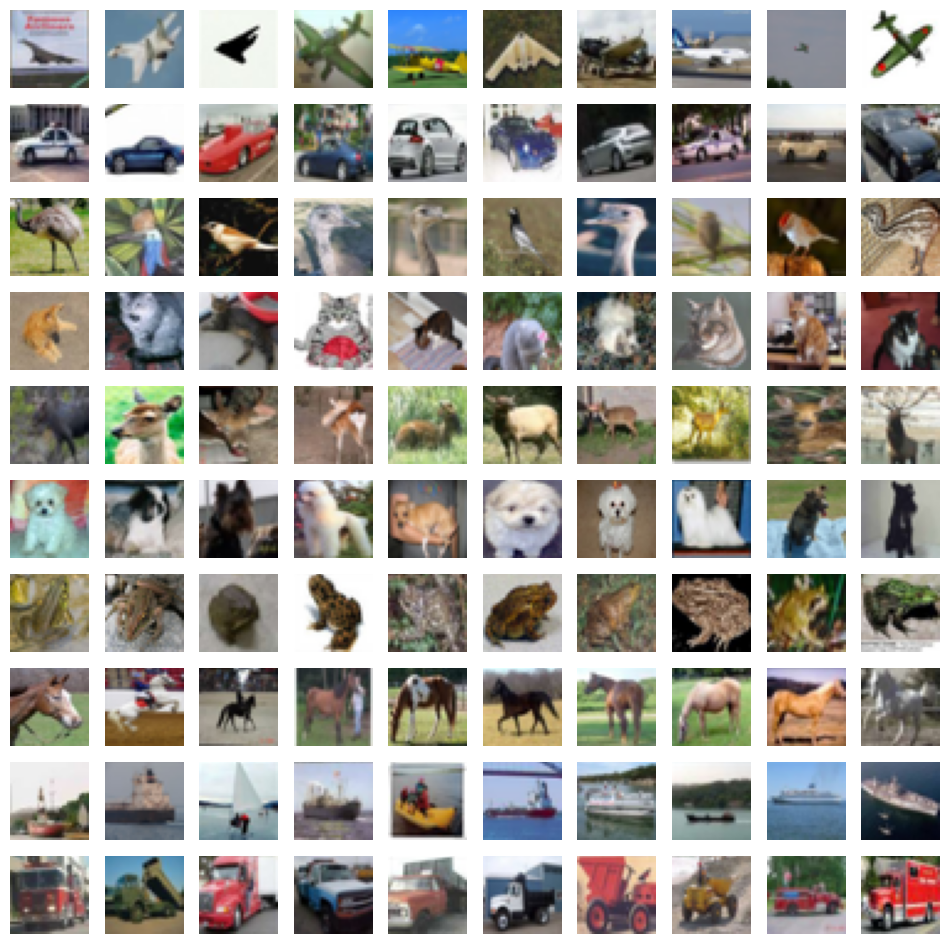

training input shape :  (50000, 32, 32, 3)
training output shape:  (50000, 1)
testing input shape  :  (10000, 32, 32, 3)
testing output shape :  (10000, 1)


In [414]:
def show_imgs(X,y):
    plt.figure(1, figsize=(12,12))
    k = 0
    for i in range(0,10):
        for j in range(0,10):
            while y[k] != i: k += 1
            plt.subplot2grid((10,10),(i,j))
            plt.imshow(X[k])
            plt.axis('off')
            k += 1
    plt.show()

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
show_imgs(X_test, y_test)
print('training input shape : ', X_train.shape)
print('training output shape: ', y_train.shape)
print('testing input shape  : ', X_test.shape)
print('testing output shape : ', y_test.shape)

In [415]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [416]:
n_classes = 10
Y_train = utils.to_categorical(y_train, n_classes)
Y_test = utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## Exo 2 - A and functions preparation

In [417]:
from keras.models import load_model
from keras import models
# Load the previously saved model
model = load_model('best_model_lower_DA.h5')

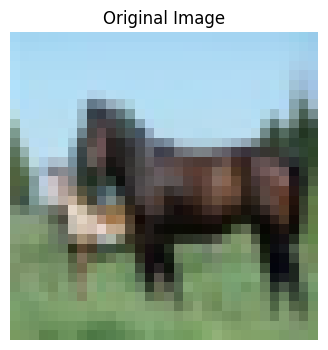

In [418]:
import numpy as np

img_index = 12
img = X_train[img_index] 

# Display the original image
plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.title("Original Image")
plt.axis('off') 
plt.show()

In [419]:
import matplotlib.pyplot as plt

def display_activations(activations, col_size, row_size, index_layer):
    activation = activations[index_layer]

    if len(activation.shape) == 4:
        # This is a convolutional layer
        filter_count = activation.shape[-1]
        fig, ax = plt.subplots(row_size, col_size, figsize=(row_size * 2.5, col_size * 2.5))
        for row in range(row_size):
            for col in range(col_size):
                index = col + row * col_size
                if index < filter_count:
                    ax[row, col].imshow(activation[0, :, :, index], cmap='viridis')
                ax[row, col].axis('off')
    elif len(activation.shape) == 2:
        # This is a dense layer
        # We might want to visualize it differently, for example using a bar plot
        fig, ax = plt.subplots(figsize=(10, 2))
        ax.bar(range(activation.shape[-1]), activation[0, :], color='blue')
        ax.set_title('Layer {}'.format(index_layer + 1))
        plt.show()
    else:
        print("Cannot display activations for the layer with shape:", activation.shape)

def get_activations(kind_of_layer):
    img_input = np.expand_dims(img, axis=0)
    layer_outputs = [layer.output for layer in model.layers if kind_of_layer in layer.name]
    activation_model= models.Model(inputs=model.input, outputs=layer_outputs)
    activations = activation_model.predict(img_input)
    return activations


In [420]:
# Allows to know the name of the layers
model.layers

### Exo 2 B,C - CONV2D

In [421]:
activations_conv = get_activations('conv')

1/1 [==============================] - 0s 156ms/step


In [422]:
print(f"In the model there is {len(activations_conv)} conv layers")

In the model there is 4 conv layers


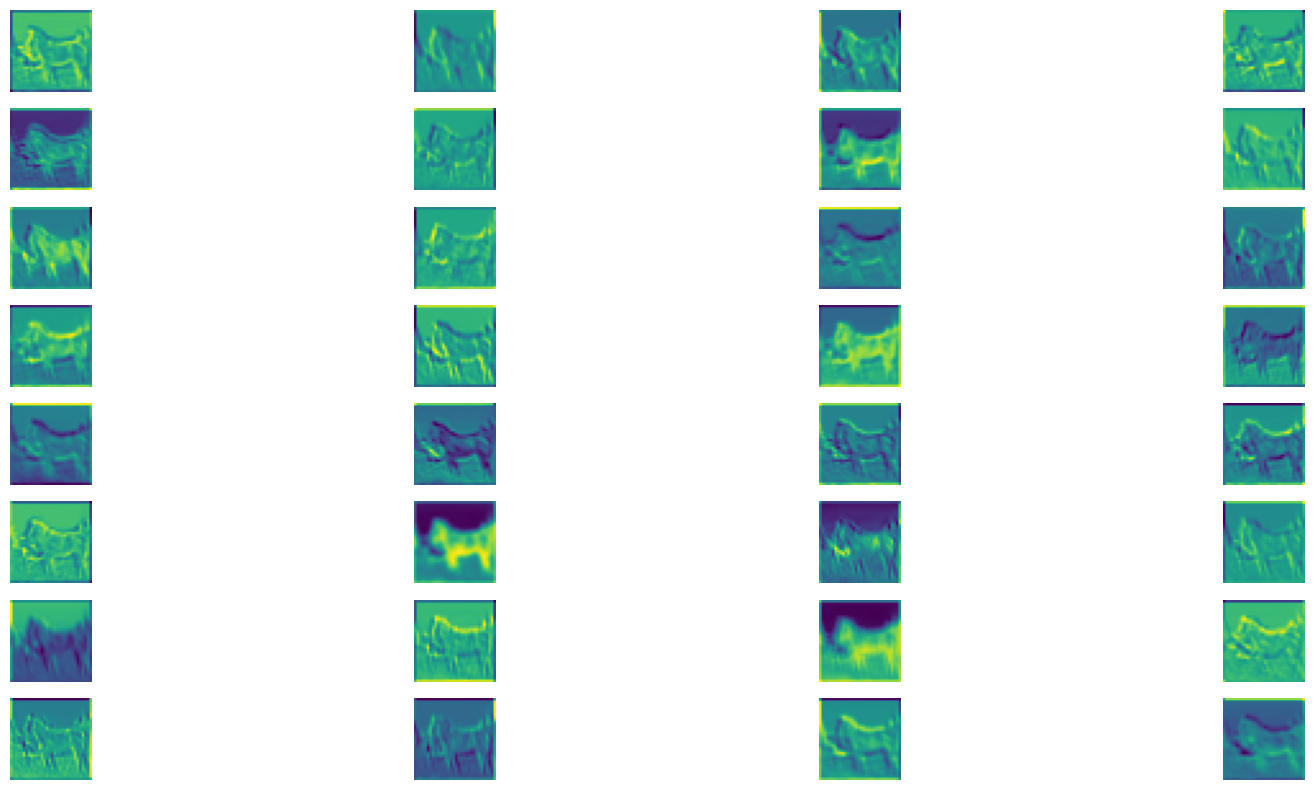

In [423]:
#first conv layer
display_activations(activations_conv, col_size=4, row_size=8, index_layer=0)

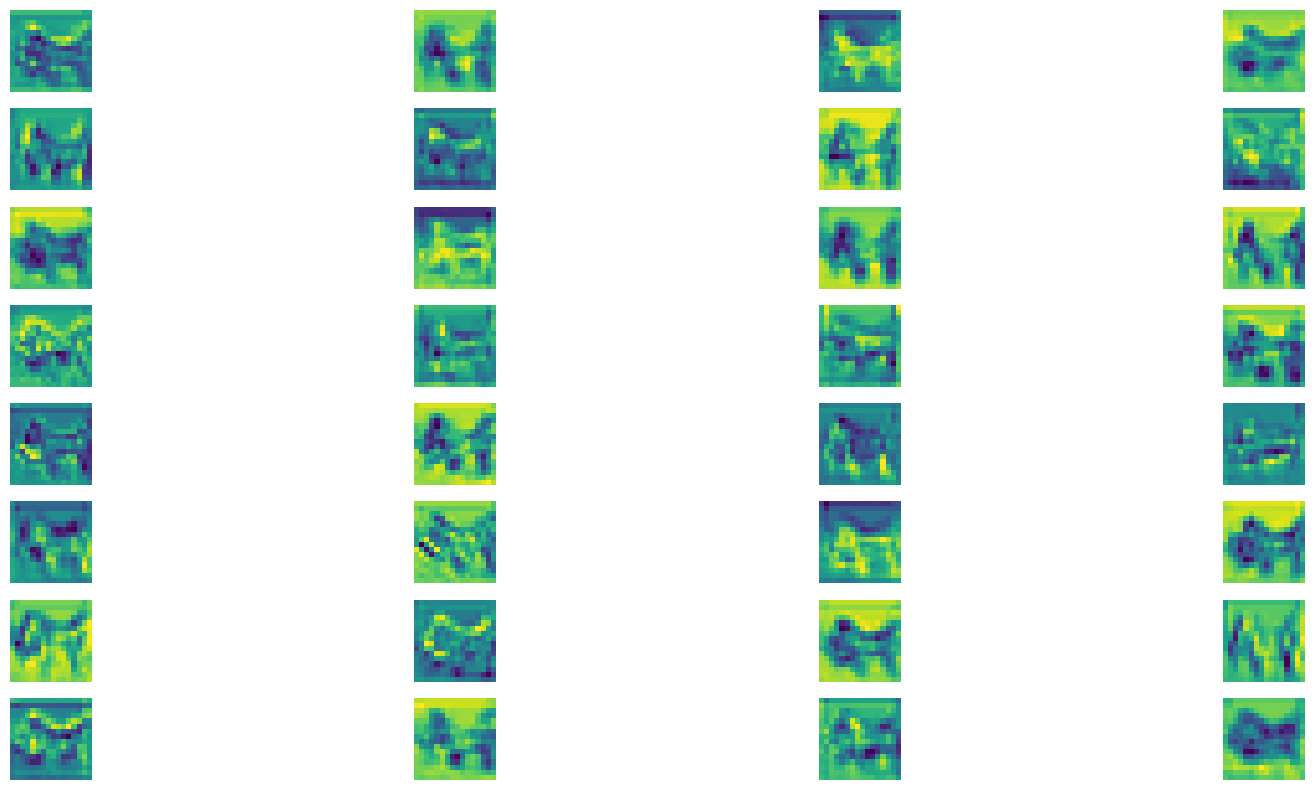

In [424]:
#last conv layer
display_activations(activations_conv, col_size=4, row_size=8, index_layer=2)


The conv layers are the convolutional layers in the network. These layers apply a set of filters to the input image to extract features from the image. The filters are learned during the training process and are used to detect patterns and features in the input data.

In the first subplots, we can see that the conv layers are detecting simple patterns and features in the input image, such as edges and textures. This is because the first conv layer is the first layer in the network, so it is responsible for detecting low-level features in the input data.

In the second subplots, we can see that the conv layers are detecting more complex patterns and features in the input image, such as shapes and objects. This is because the last conv layer is deeper in the network, so it is responsible for detecting higher-level features in the input data. However these detections appears blurred since it's a deeper layer.  

# Exo 2 B,C- MaxPooling2D

In [425]:
activations_maxp = get_activations('max_p')

1/1 [==============================] - 0s 150ms/step


In [426]:
print(f"In the model there is {len(activations_maxp)} max_p conv layers")

In the model there is 2 max_p conv layers


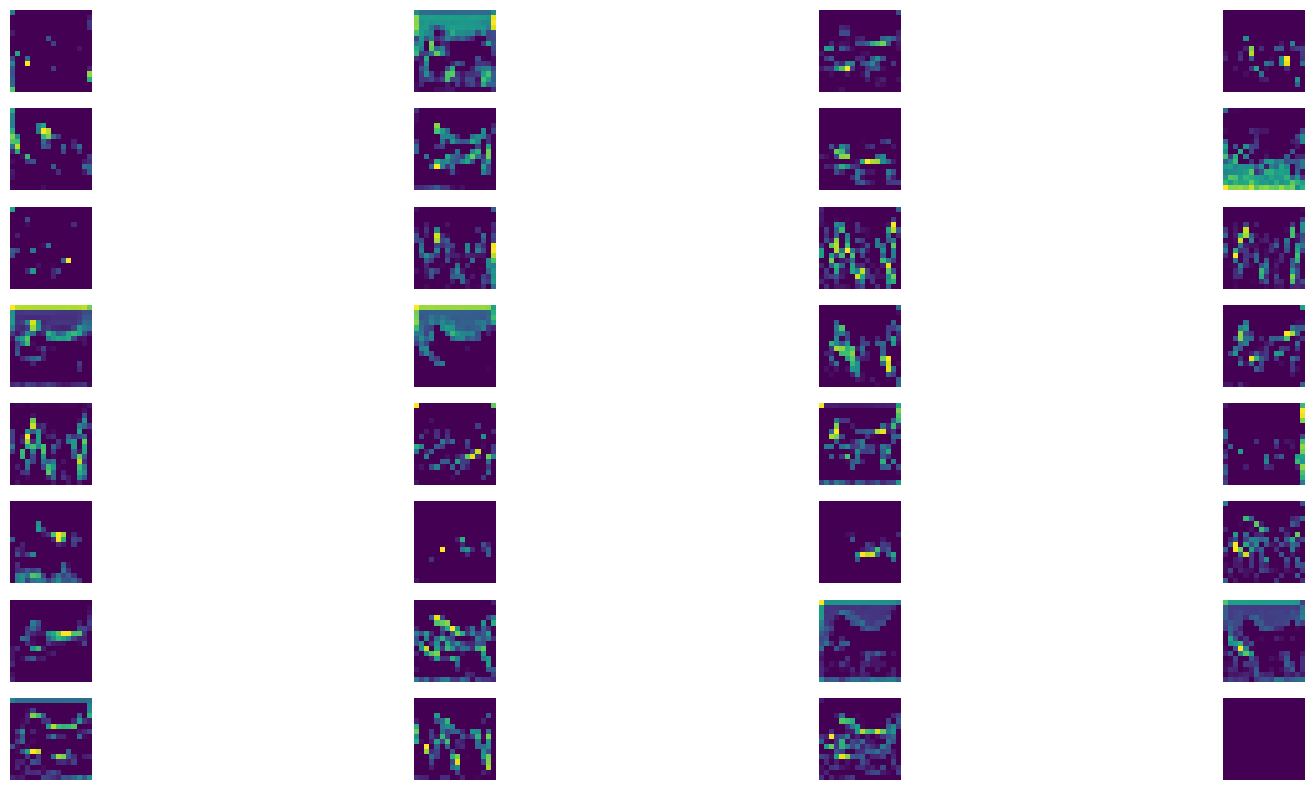

In [427]:
#first max_p layer
display_activations(activations_maxp, col_size=4, row_size=8, index_layer=0)

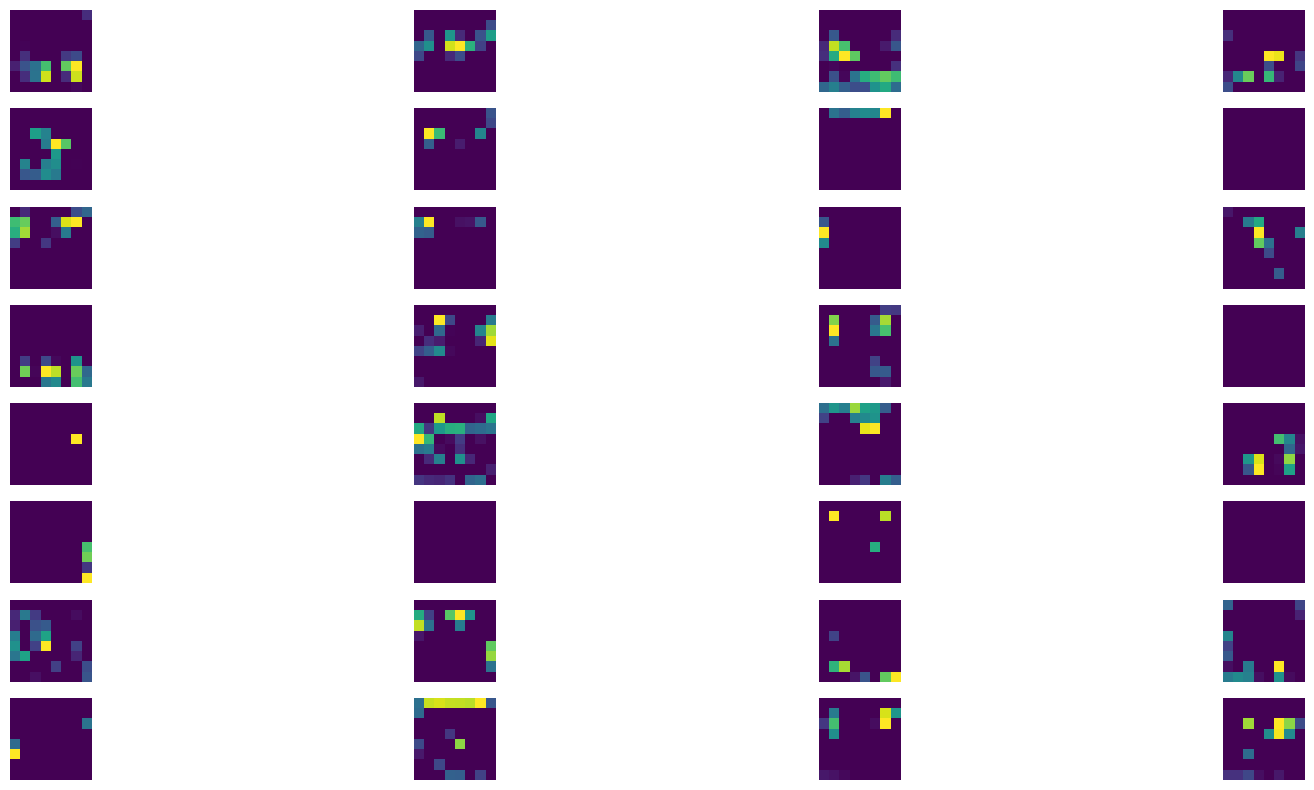

In [428]:
#first max_p layer
display_activations(activations_maxp, col_size=4, row_size=8, index_layer=1)

The max pooling layer reduces the spatial dimensions (i.e., height and width) of the input feature map it processes. It does this by sliding a window (usually 2x2) over the feature map and selecting the maximum value in each window as the output for that region.

In the fist subplots we can see that images are pixelated, this is because the max pooling layer reduces the spatial dimensions of the input feature map by selecting the maximum value in each window. This process is repeated for each window in the feature map, resulting in a downsampled version of the input.

In the second subplots we can see that the images are more pixelated than the first subplots, this is because we're in the last max pooling layer, so the spatial dimensions of the input feature map have been reduced multiple times. This results in a more downsampled version of the input, which can help the network learn higher-level features by focusing on the most important information in the input.

### Exo 2 B,C - RELU

In [429]:
activations_relu = get_activations('activation')

1/1 [==============================] - 0s 214ms/step


In [430]:
print(f"In the model there is {len(activations_relu)} relu layers")

In the model there is 6 relu layers


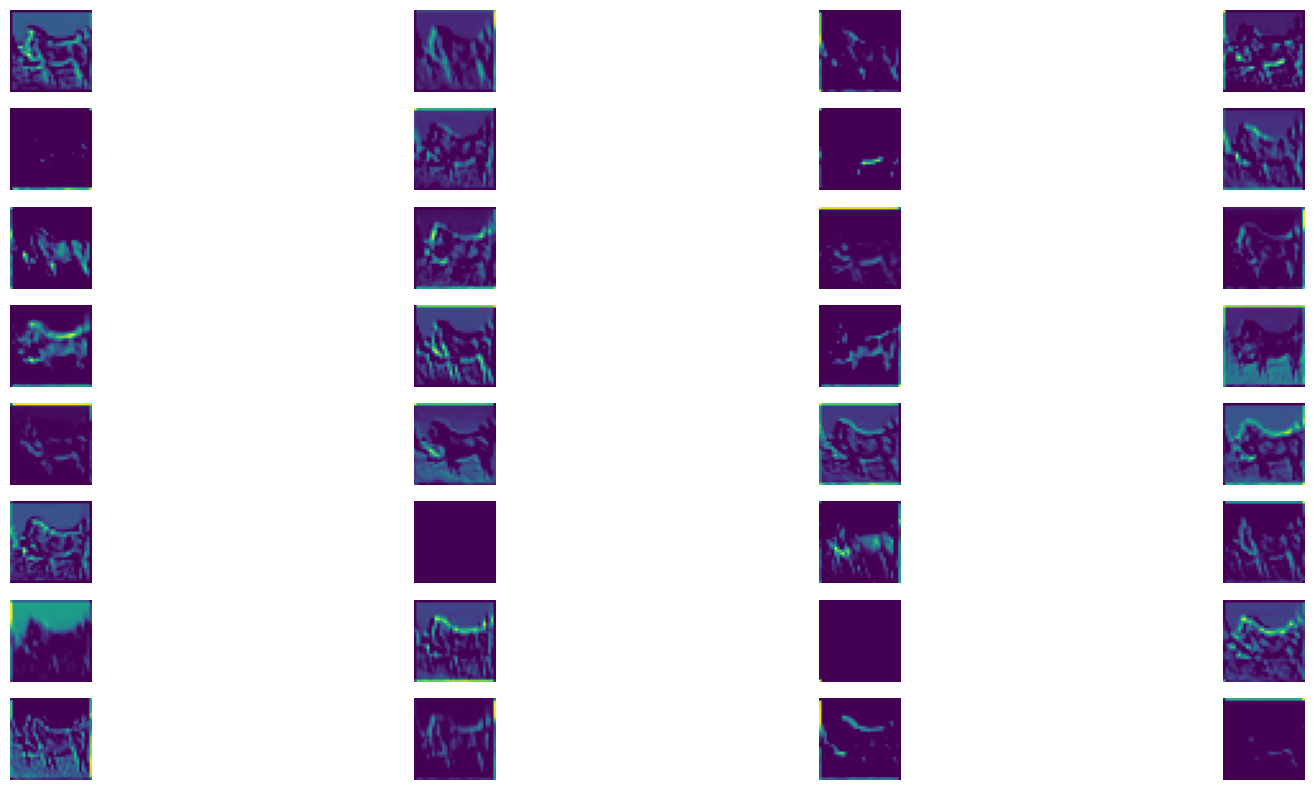

In [431]:
#First relu layer
display_activations(activations_relu, col_size=4, row_size=8, index_layer=0)

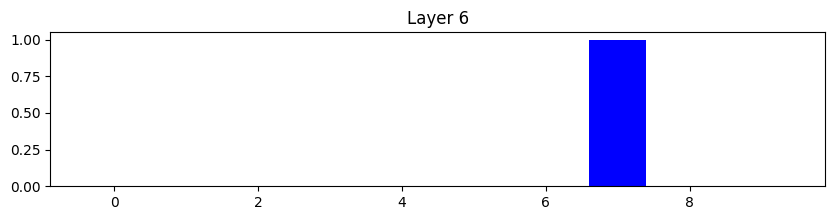

In [432]:
#Last relu layer
display_activations(activations_relu, col_size=4, row_size=8, index_layer=5)

The ReLU (Rectified Linear Unit) activation function is a simple but effective non-linear activation function used in neural networks. It introduces non-linearity to the network by setting all negative values in the input to zero and leaving positive values unchanged.

In the first subplots, we can see that the ReLU activation function has been applied to the output of the convolutional layers. This introduces non-linearity to the network and helps the network learn complex patterns and features in the input data. It can visually be seen here because images are darker and have more contrast.

In the second subplots,it's the last ReLU layer. We're not anymore trying to detect features instead we're detecting the class of the image. The ReLU activation function is applied to the output of the dense layer, which is the final layer before the output layer. This helps the network make predictions by transforming the input data into a format that can be used to classify the input image into one of the ten classes in the CIFAR-10 dataset. Here we can see that the class 7 is predicted which is correct given that it's the horse class.